Machine Learning Methods used here:
1. Logistic Regression
2. Support Vector Machines**
3. Decision Tree
4. K Nearest Neighbors
5. Ensemble Methods(Random Forest, Adaboost, Gradient Boost)

За основу был взят ноутбук: https://www.kaggle.com/sanchitvj/sdss-dr16-data-analysis/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Required Libraries and Reading Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

Загружаем основную выборку со всеми классами:

In [4]:
df = pd.read_csv('./input/SpecPhotoAll_mali_na.csv') #запущена другая выборка

df.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,STAR,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,STAR,WDhotter,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,GALAXY,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,QSO,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,QSO,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


Загружаем выборку со всем звездами:

In [16]:
df_star = pd.read_csv('./input/SpecPhotoAll_star.csv') 

df_star.head()

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.994933e+17,1237650795146576079,146.91375,-0.644481,51602,266,0.000661,0.000023,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
1,2.994935e+17,1237650795146576079,146.91375,-0.644481,51630,266,0.000601,0.000020,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
2,2.994954e+17,1237650795683643399,147.25534,-0.319337,51602,266,-0.000203,0.000017,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
3,2.994965e+17,1237650795683643399,147.25534,-0.319337,51630,266,-0.000244,0.000018,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
4,2.994974e+17,1237648721216340121,147.09176,-0.077346,51602,266,0.000603,0.000177,STAR,WD,20.46657,20.06338,20.32423,20.55201,21.10359,20.43325,20.05210,20.30676,20.46825,21.10327


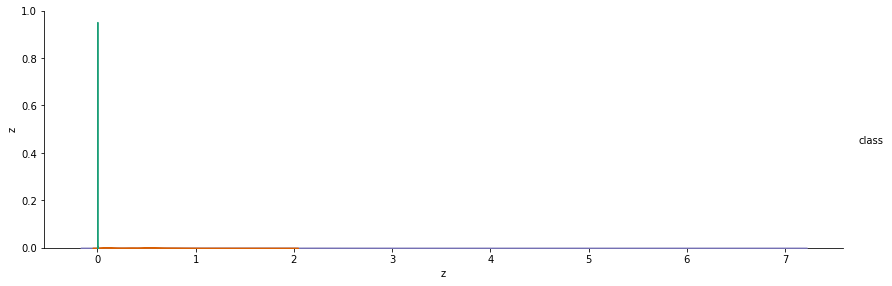

In [6]:
sns.pairplot(data = df, palette = 'Dark2', vars='z', hue = 'class', height=4, aspect=3)

In [6]:
sum(df['cModelMag_r'] < 0)

146

In [7]:
df = df.loc[df['cModelMag_r'] > 0]
df.shape

(5241572, 17)

In [17]:
print(df_star.shape)
df_star = df_star.loc[df_star['cModelMag_r'] > 0]
df_star.shape

(1103720, 20)


(1103679, 20)

# Exploratory Data Analysis

In [9]:
df.shape

(5241572, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241572 entries, 0 to 5241717
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   ra           float64
 2   dec          float64
 3   z            float64
 4   zErr         float64
 5   class        object 
 6   subClass     object 
 7   psfMag_u     float64
 8   psfMag_g     float64
 9   psfMag_r     float64
 10  psfMag_i     float64
 11  psfMag_z     float64
 12  cModelMag_u  float64
 13  cModelMag_g  float64
 14  cModelMag_r  float64
 15  cModelMag_i  float64
 16  cModelMag_z  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 719.8+ MB


In [11]:
df.describe()

,objID,ra,dec,z,zErr,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
count,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06,5.241572e+06
mean,1.237665e+18,1.710428e+02,2.404899e+01,6.151072e-01,5.645914e-02,2.222979e+01,2.107634e+01,2.026163e+01,1.968807e+01,1.932292e+01,2.122483e+01,2.039509e+01,1.960548e+01,1.902426e+01,1.864773e+01
std,8.414902e+12,9.495384e+01,1.939210e+01,7.781602e-01,1.814245e+01,3.101479e+01,2.876606e+01,1.721802e+00,1.913861e+01,2.278854e+01,3.102011e+01,2.876653e+01,1.848000e+00,1.964626e+01,2.279793e+01
min,1.237646e+18,9.090791e-05,-1.970271e+01,-1.154793e-02,-6.000000e+00,-9.999000e+03,-9.999000e+03,8.449972e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.033073e+01,-9.999000e+03,-9.999000e+03
25%,1.237658e+18,1.247899e+02,6.134966e+00,6.104999e-02,2.494532e-05,2.097721e+01,1.974971e+01,1.905435e+01,1.869567e+01,1.839211e+01,1.983958e+01,1.884655e+01,1.805693e+01,1.768966e+01,1.745094e+01
50%,1.237664e+18,1.731034e+02,2.351110e+01,4.391202e-01,9.516442e-05,2.247772e+01,2.139724e+01,2.059706e+01,2.006323e+01,1.966434e+01,2.113364e+01,2.093074e+01,2.009623e+01,1.942170e+01,1.899175e+01
75%,1.237668e+18,2.255339e+02,3.919553e+01,7.413105e-01,2.098590e-04,2.386296e+01,2.273617e+01,2.153446e+01,2.080624e+01,2.035369e+01,2.244874e+01,2.195489e+01,2.101867e+01,2.037105e+01,1.986304e+01
max,1.237681e+18,3.599999e+02,8.485214e+01,7.051930e+00,3.068822e+04,3.192045e+01,3.032868e+01,2.971638e+01,2.995165e+01,2.748061e+01,3.428534e+01,3.330923e+01,3.088891e+01,3.268382e+01,3.119199e+01


In [12]:
df[df['z'] > 2].shape

(412240, 17)

In [13]:
df['z'].value_counts()

 0.000000    23941
 7.011245      440
 0.004153      228
 0.004153      201
-0.004136      136
             ...  
 0.706739        1
 0.191593        1
 0.496205        1
 0.037252        1
 0.088262        1
Name: z, Length: 4496220, dtype: int64

In [14]:
#df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
#df.head(3)

In [15]:
df.isnull().sum()
df1 = df.copy()

# Распределения звезд по подклассам:

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

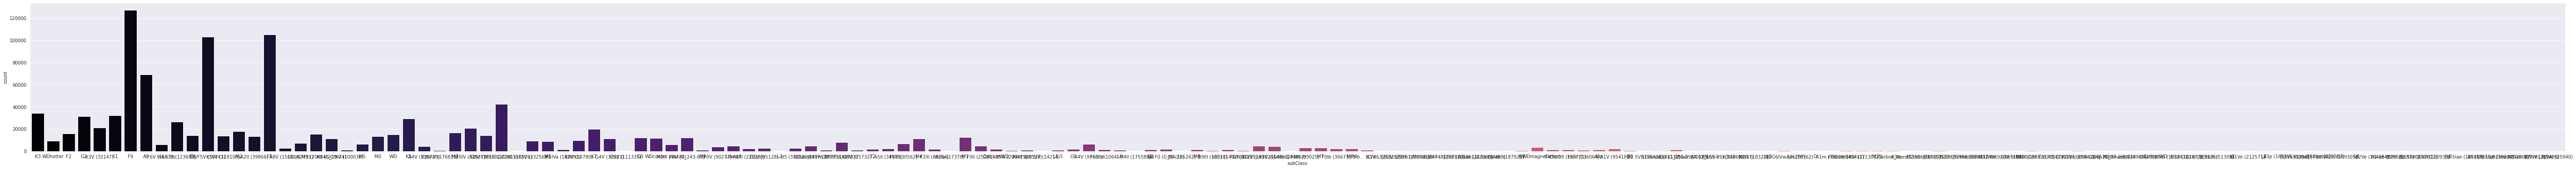

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df[df['class']=='STAR']['subClass'], palette = 'magma')

In [9]:
df[df['class']=='STAR']['subClass'].value_counts()

F9                 127103
F5                 105298
F3/F5V (30743)     102933
A0                  69106
M5III (221615)      42675
                    ...  
B7IVe (209409)         26
K5III (120933)         16
B3Ve (25940)           16
B2Vne (202904)         14
M5Iab: (197812)        12
Name: subClass, Length: 164, dtype: int64

In [10]:
df[df['subClass']=='O'].shape

(559, 17)

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

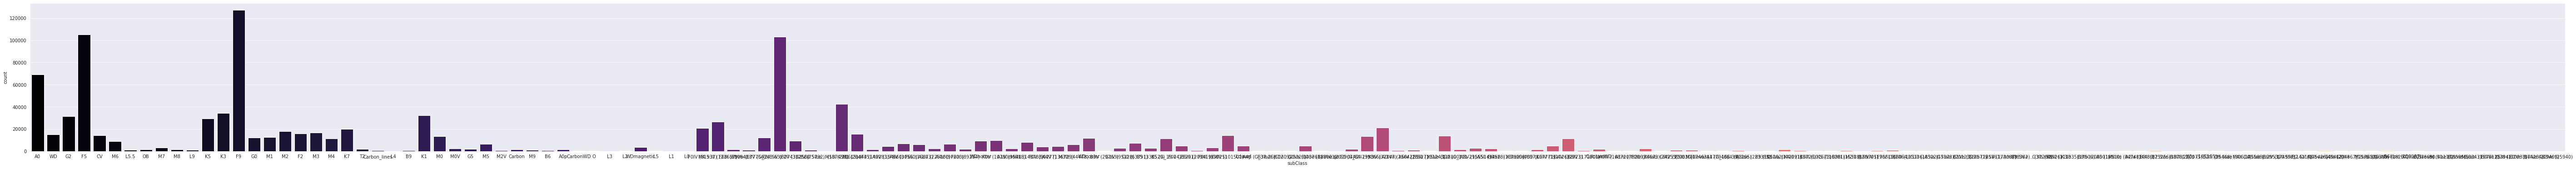

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df_star['subClass'], palette = 'magma')

Заметим, что подклассы распределены не равномерно. Постараемся объединить некоторые из них их.

In [23]:
sub_class_val = df_star['subClass'].value_counts()
sub_class_val

F9                 127107
F5                 105298
F3/F5V (30743)     102933
A0                  69107
M5III (221615)      42675
                    ...  
B7IVe (209409)         26
K5III (120933)         16
B3Ve (25940)           16
B2Vne (202904)         14
M5Iab: (197812)        12
Name: subClass, Length: 164, dtype: int64

In [25]:
def renameSubClass(a, a_str):
    for i in range(len(a)):
        labels = {a[i]: a_str}
        df_star.replace({'subClass':labels}, inplace = True)

In [26]:
sub_class = df_star['subClass'].unique()
sub_class_val[sub_class[[i for i in range(len(sub_class)) if 'O' in sub_class[i]]]].sum()

3856

Заметим, что звезд подкласса 'O' не так много, попробуем объеденить их с подклассом 'B'

In [27]:
OB = sub_class[[i for i in range(len(sub_class)) if 'O' in sub_class[i]or 'B' in sub_class[i]]]
renameSubClass(OB, 'OB')
sub_class_val[OB].sum() 

16355

In [29]:
M0 = sub_class[[i for i in range(len(sub_class)) if 'M0' in sub_class[i]]]
renameSubClass(M0, 'M0')
M1 = sub_class[[i for i in range(len(sub_class)) if 'M1' in sub_class[i]]]
renameSubClass(M1, 'M1')
M2 = sub_class[[i for i in range(len(sub_class)) if 'M2' in sub_class[i]]]
renameSubClass(M2, 'M2')
M3 = sub_class[[i for i in range(len(sub_class)) if 'M3' in sub_class[i]]]
renameSubClass(M3, 'M3')
M4 = sub_class[[i for i in range(len(sub_class)) if 'M4' in sub_class[i]]]
renameSubClass(M4, 'M4')
M5 = sub_class[[i for i in range(len(sub_class)) if 'M5' in sub_class[i]]]
renameSubClass(M5, 'M5')
M = sub_class[[i for i in range(len(sub_class)) if 'M6' in sub_class[i] or 'M7' in sub_class[i] or 'M8' in sub_class[i] or 'M9' in sub_class[i]]]
renameSubClass(M, 'M')
sub_class_val[M].sum()

24084

In [30]:
A0 = sub_class[[i for i in range(len(sub_class)) if 'A0' in sub_class[i]]]
A12 = sub_class[[i for i in range(len(sub_class)) if 'A1' in sub_class[i] or 'A2' in sub_class[i]]]
A = sub_class[[i for i in range(len(sub_class)) if 'A' in sub_class[i] and 'A0' not in sub_class[i] and 'A1' not in sub_class[i] and 'A2' not in sub_class[i]]]
sub_class_val[A12].sum()

18985

In [31]:
renameSubClass(A0, 'A0')
renameSubClass(A12, 'A12')
renameSubClass(A, 'A')

In [32]:
G0 = sub_class[[i for i in range(len(sub_class)) if 'G0' in sub_class[i]]]
G8 = sub_class[[i for i in range(len(sub_class)) if 'G8' in sub_class[i]]]
G = sub_class[[i for i in range(len(sub_class)) if 'G1' in sub_class[i] or 'G3' in sub_class[i] or 'G5' in sub_class[i] or 'G4' in sub_class[i] or 'G9' in sub_class[i]]]
sub_class_val[G0].sum()

26674

In [33]:
renameSubClass(G0, 'G0')
renameSubClass(G8, 'G8')
renameSubClass(G, 'G')

In [34]:
F8 = sub_class[[i for i in range(len(sub_class)) if 'F8' in sub_class[i]]]
F = sub_class[[i for i in range(len(sub_class)) if 'F9I' in sub_class[i] or 'F5Ib... (17463)' in sub_class[i] or ('F' in sub_class[i] and 'F5' not in sub_class[i] and 'F3/F5V' not in sub_class[i] and 'F8' not in sub_class[i] and 'F9' not in sub_class[i])]]
sub_class_val[F].sum()
#sub_class_val[sub_class[[i for i in range(len(sub_class)) if 'F' in sub_class[i]]]]

77208

In [35]:
renameSubClass(F8, 'F8')
renameSubClass(F, 'F')

In [36]:
K0 = sub_class[[i for i in range(len(sub_class)) if 'K0' in sub_class[i]]]
K = sub_class[[i for i in range(len(sub_class)) if 'K5 (' in sub_class[i] or 'K5I' in sub_class[i] or 'K1V' in sub_class[i] or 'K3I' in sub_class[i] or 'K3p' in sub_class[i] or 'K4' in sub_class[i] or 'K1I' in sub_class[i] or 'K2' in sub_class[i]]]
K
#sub_class_val[sub_class[[i for i in range(len(sub_class)) if 'K' in sub_class[i]]]]

array(['K5 (G_19-24)', 'K1V... (25329)', 'K3Iab: (4817)',
       'K4Iab: (34255)', 'K1IVa (142091)', 'K4III (136726)',
       'K3III (101673)', 'K5 (110281)', 'K2III (115136)', 'K1III (18322)',
       'K5III (111335)', 'K3Ib... (17506)', 'K3p (165195)',
       'K5III (120933)'], dtype=object)

In [37]:
renameSubClass(K0, 'K0')
renameSubClass(K, 'K')

In [46]:
LT = sub_class[[i for i in range(len(sub_class)) if 'L' in sub_class[i] or 'T' in sub_class[i]]]
renameSubClass(LT, 'LT')
sub_class_val[LT]

L5.5      1085
L9        1075
T2        2021
L4          90
L3          53
L2         170
L5         181
L1         110
L0          89
Ldwarf    4869
Name: subClass, dtype: int64

In [52]:
WD1 = sub_class[[i for i in range(len(sub_class)) if 'WD' in sub_class[i] and sub_class[i] != 'WD']]
renameSubClass(WD1, 'WD1')
sub_class_val[WD1]

CarbonWD        382
WDmagnetic     3644
WDhotter       9477
WDcooler      11943
CalciumWD      1940
Name: subClass, dtype: int64

In [55]:
C = sub_class[[i for i in range(len(sub_class)) if 'C' in sub_class[i]]]
renameSubClass(C, 'C')
sub_class_val[C].sum()

18844

In [91]:
print(len(df_star['subClass'].unique()))
df_star['subClass'].value_counts()

32


F9                127107
F5                105298
F3/F5V (30743)    102933
F                  77208
A0                 71332
M5                 49389
M4                 38154
K3                 34239
K1                 32136
G2                 31603
K5                 29338
M1                 27938
WD1                27386
G0                 26674
M                  24084
M3                 23063
A                  23043
K3V (32147)        21233
F8                 20002
K7                 19901
G                  19517
A12                18985
M2                 18880
C                  16522
K                  16438
OB                 16355
M0                 15919
G8                 15619
WD                 14947
K0                 14750
K5Ve (118100)      13943
LT                  9743
Name: subClass, dtype: int64

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='subClass', ylabel='count'>

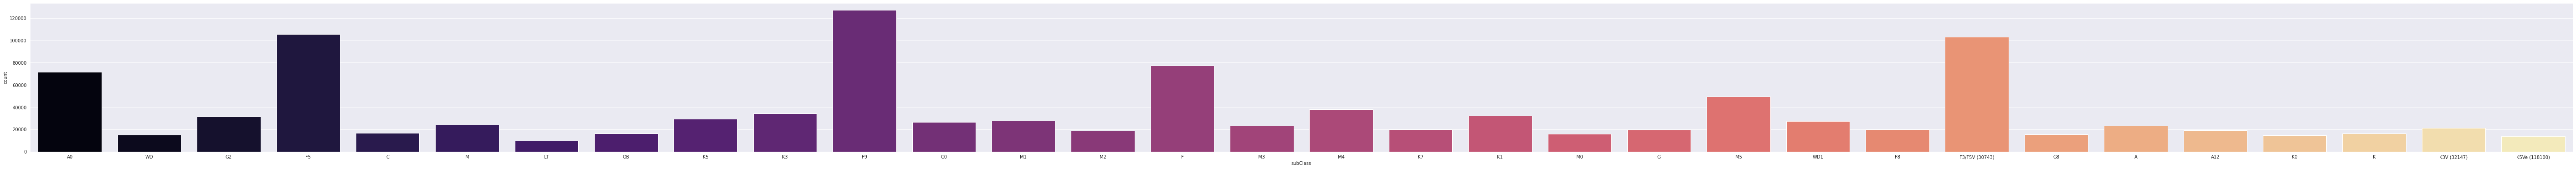

In [76]:
sns.set_style('darkgrid')
plt.figure(figsize = (100, 6))
sns.countplot(df_star['subClass'], palette = 'magma')

# Визуализируем данные

/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

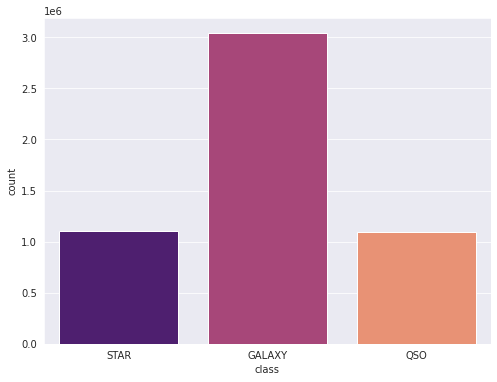

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')

In [ ]:
sns.pairplot(data = df, palette = 'Dark2', hue = 'class')

<AxesSubplot:xlabel='class', ylabel='mjd'>

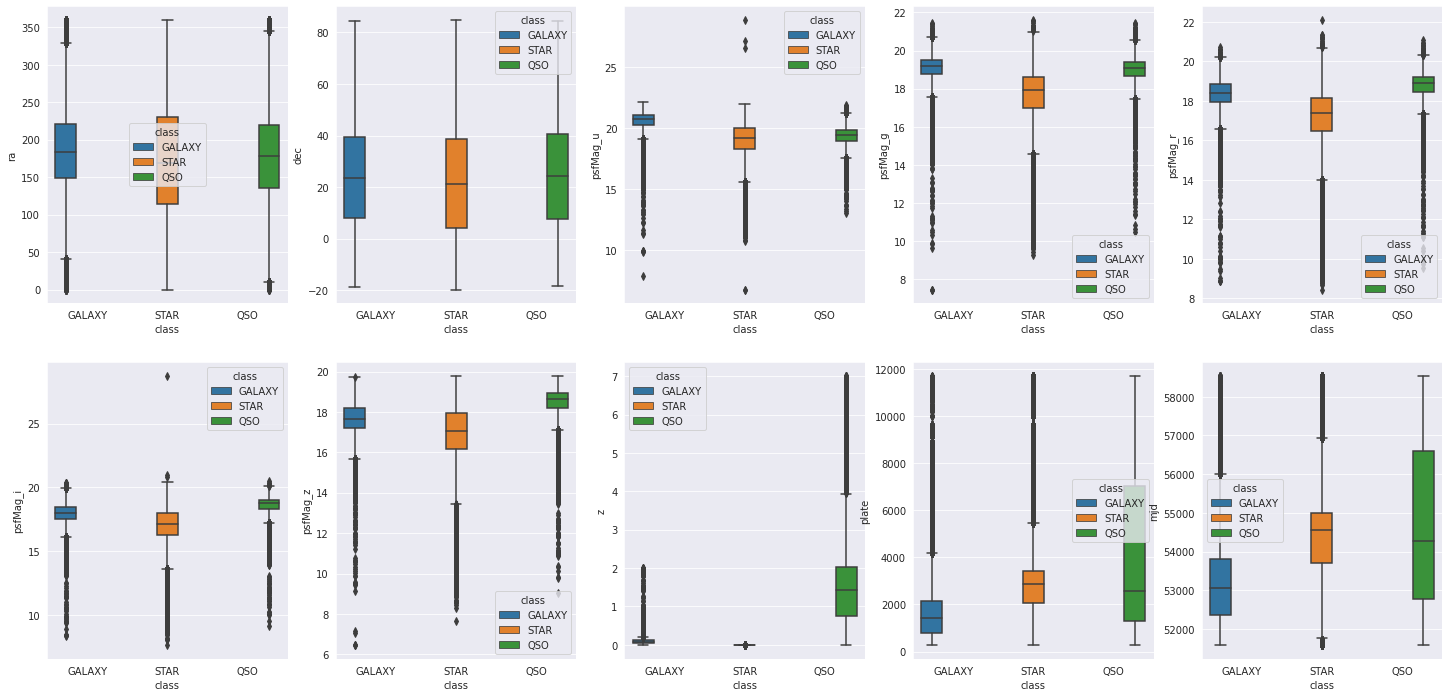

In [14]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df) 
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'psfMag_u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'psfMag_g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'psfMag_r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'psfMag_i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'psfMag_z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

In [17]:
#sns.boxplot(x = 'class', y = 'z', hue = 'class', data = df1)

In [ ]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'psfMag_i', y='psfMag_z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'psfMag_r', y='psfMag_g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='z', ylabel='Density'>

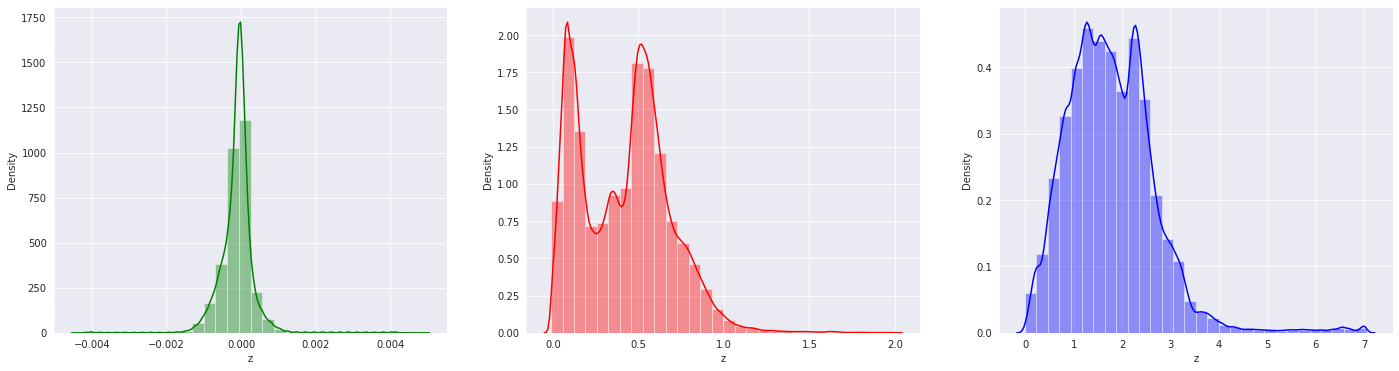

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].z, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].z, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].z, ax = ax3, bins = 30, color = 'b')

Распределение по признаку psfMag_r

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cModelMag_r', ylabel='Density'>

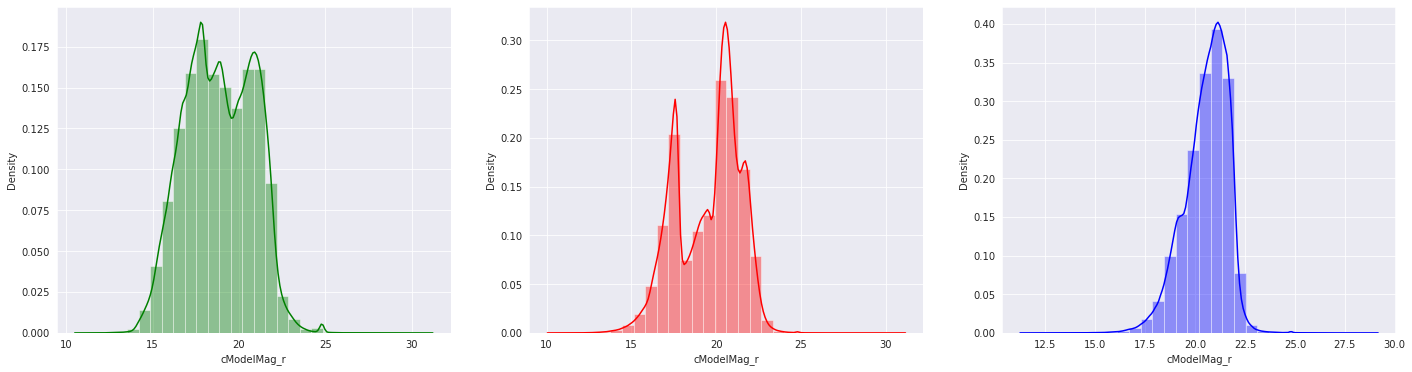

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].cModelMag_r, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].cModelMag_r, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].cModelMag_r, ax = ax3, bins = 30, color = 'b')

In [79]:
df.var()

objID          7.081058e+25
ra             9.016232e+03
dec            3.760535e+02
z              6.055332e-01
zErr           3.291484e+02
psfMag_u       9.619171e+02
psfMag_g       8.274864e+02
psfMag_r       2.964601e+00
psfMag_i       3.662866e+02
psfMag_z       5.193175e+02
cModelMag_u    9.622475e+02
cModelMag_g    8.275135e+02
cModelMag_r    3.415105e+00
cModelMag_i    3.859756e+02
cModelMag_z    5.197456e+02
dtype: float64

<AxesSubplot:>

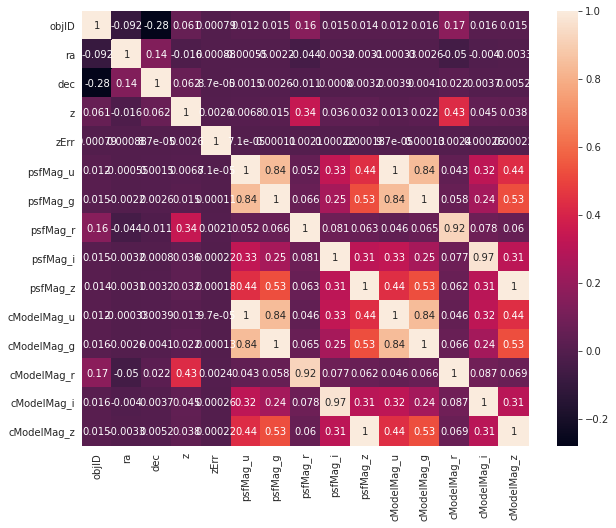

In [80]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

# Feature Engineering

Изеняем метки класса в целые числа

In [57]:
df3 = df.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,1,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,1,WDhotter,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,2,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,3,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,3,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


Создадим дополнительную выборуку, чтобы проэксперементировать с классификаторами, отделяющие только STAR

In [58]:
df2 = df3.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':2}
df2.replace({'class':labels}, inplace = True)
df2.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,1,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,1,WDhotter,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,2,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,2,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,2,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414


In [59]:
df3 

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237671256908628119,71.158077,21.333093,0.000127,0.000007,STAR,K3,18.60245,16.39218,15.41919,15.02712,14.80693,18.56369,16.39435,15.41744,15.03489,14.80436
1,1237662224090988683,245.087060,21.761936,-0.000114,0.000021,STAR,WDhotter,17.05462,17.11506,17.52513,17.79336,18.08322,17.04298,17.10623,17.50796,17.80872,18.10710
2,1237678439696957925,31.079203,3.429988,0.600258,0.000121,GALAXY,NaN,24.68714,22.30432,20.88555,19.98248,19.67558,24.76204,21.75368,20.48914,19.52968,19.21125
3,1237658205035823360,144.343990,42.530499,3.204911,0.000755,QSO,NaN,24.69678,21.42912,21.20449,21.01514,21.40008,24.90437,21.41079,21.20130,21.02791,21.41992
4,1237667113333817747,142.735950,25.753559,2.302619,0.000296,QSO,BROADLINE,21.99980,21.40259,21.57071,21.51316,20.84446,21.94518,21.32935,21.49114,21.23290,20.86414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241713,1237680272571105645,328.088070,18.738578,-0.000010,0.000007,STAR,K5Ve (118100),21.17160,18.22463,16.95559,16.51219,16.14440,20.87629,18.22747,16.97745,16.49551,16.15476
5241714,1237653651306184879,19.098280,14.131638,0.316044,0.000045,GALAXY,NaN,22.56285,21.10023,19.45232,18.98361,18.53853,22.62634,20.30509,18.91942,18.29231,18.02235
5241715,1237663783118963291,349.348900,-0.661332,0.699559,0.000048,GALAXY,NaN,23.24423,23.09474,22.73910,22.20590,21.42973,22.54075,21.18786,22.32401,21.56820,18.79706
5241716,1237679476935295070,4.681285,21.984656,-0.000843,0.000012,STAR,F3/F5V (30743),18.69630,17.73908,17.30717,17.12296,17.04868,18.71272,17.72582,17.30536,17.11994,17.05235


In [ ]:
df4 = df3.copy()
df4 = df4.merge(df_par, how='inner', left_on='objID', right_on='objId')
#pd.merge(df4, df_par, how ='inner', on ='objID') 
df4

In [ ]:
df4.drop_duplicates()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df4[df4['class'] == 'STAR'].cModelMag_r, ax = ax1, bins = 30, color = 'g')
sns.distplot(df4[df4['class'] == 'GALAXY'].cModelMag_r, ax = ax2, bins = 30, color = 'r')
sns.distplot(df4[df4['class'] == 'QSO'].cModelMag_r, ax = ax3, bins = 30, color = 'b')

В оригинальной тетрадке была отмечена зависимость признаков u, g, r, i, z (в этом можно убедиться на графиках выше), поэтому было осуществлено сжатие данных признаков с помощью PCA. Я этого делать не буду, т.к. хочу получить зависимость точности классификации STAR конкретно от признака r (звездной величины).

In [60]:
df = df.sort_values(by='cModelMag_r')

Data separation into features and labels

In [61]:
X = df.drop(['class','subClass'], axis = 1).values
y = df['class'].values
X.shape

(5241572, 15)

In [62]:
X2 = df2.drop(['class','subClass'], axis = 1).values
y2 = df2['class'].values
X2.shape

(5241572, 15)

Дополнительная выборка только звезд, на которой так же можно проверять точность:

In [69]:
Xs = df_star.drop(['class','subClass', 'mjd', 'plate', 'specObjID'], axis = 1).values
ys = np.ones(Xs.shape[0])
Xs.shape

(1103679, 15)

Разделение данных на обучающие и тестовые

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [65]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 123)

In [66]:
np.unique(y_train, return_counts = True)

(array([1, 2, 3]), array([330860, 912384, 329227]))

In [67]:
np.unique(y2_test, return_counts = True)

(array([1, 2]), array([ 331445, 1241027]))

Учитывая колличество элементов в каждом значения признака class, тренировочная выборка нам подходит 

Because of presence of outliers we will be using RobustScaler to perform scaling on the data. For more about it look here:
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [70]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)
X = robust.transform(X)
Xs = robust.transform(Xs)
X2_train = robust.fit_transform(X2_train)
X2_test = robust.transform(X2_test)
Xs.shape

(1103679, 15)

In [71]:
#переменные для разделения выборки по признаку cModelMag_r:
n = 30
m = df['cModelMag_r'].min()
N = (df['cModelMag_r'].max() - m) / n

def print_plot(ml): #функция построения графика зависимости метрик классификации от r
    
    precision = []
    recall = []
    f1 = []
    r_mean = []
    y_pred_all = ml.predict(X)

    for i in range(0, n):
        indx = (df['cModelMag_r'] >= (m + N * i)) & (df['cModelMag_r'] <= (m + N * (i + 1))) #создаем выборку с необходимым нам диапазоном r
        if len(y[indx]) > 100 and df[indx & df['class'] == 1].shape[0] > 1000:    #не будем брать слишком маленькие выборки
            h = classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)
            precision.append(h['1']['precision'])
            recall.append(h['1']['recall'])
            f1.append(h['1']['f1-score'])
            r_mean.append(df['cModelMag_r'][indx].mean())
            
    plt.figure(figsize = (5,4))
    plt.title('Зависимость precision от признкака cModelMag_r:')
    plt.plot(r_mean, precision, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость recall от признкака cModelMag_r:')
    plt.plot(r_mean, recall, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость f1 от признкака cModelMag_r:')
    plt.plot(r_mean, f1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    #indx = df['cModelMag_r'] < 15
    #indx1 = df['cModelMag_r'] < 18 & df['cModelMag_r'] > 16
    #return classification_report(y[indx], y_pred_all[indx], output_dict=True, zero_division=0)['1']['precision'], 

# Классификаторы

Logistic Regression 

In [84]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95    772810
           2       0.96      0.97      0.96   2127512
           3       0.97      0.90      0.93    768779

    accuracy                           0.95   3669101
   macro avg       0.95      0.95      0.95   3669101
weighted avg       0.95      0.95      0.95   3669101

Confusion Matrix: 
 [[ 751394   21333      83]
 [  44762 2060314   22436]
 [   5638   74050  689091]]
Training Score:  0.9539686264484369
Testing Score:  0.9541299081164568


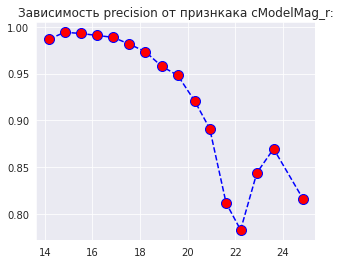

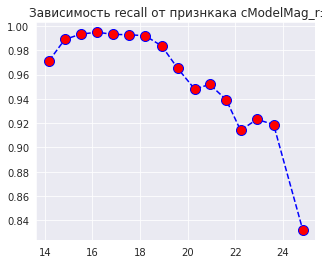

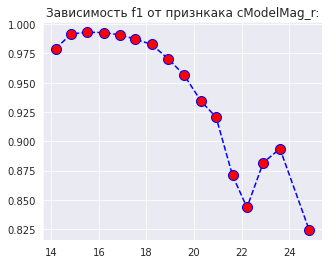

In [85]:
#lr_test_acc = printplot(lr)
print_plot(lr)

In [116]:
ys_pr = lr.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys_pr))
lr_s = lr.score(Xs, ys)
print('Star Score: ', lr_s)
print(ys)
print(ys_pr)

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.98      0.99   1103720
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98   1103720
   macro avg       0.50      0.49      0.49   1103720
weighted avg       1.00      0.98      0.99   1103720

Confusion Matrix: 
 [[1079814   23906]
 [      0       0]]
Star Score:  0.9783405211466676
[1. 1. 1. ... 1. 1. 1.]
[2 2 2 ... 1 1 1]


Это проверка классификатора, отделяющего только звезды и не звезды (пока не совсем правильноработает)

In [86]:
lr2 = LogisticRegression(max_iter=500)
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
print('Classification Report: \n', classification_report(y2_test, y2_pred))
print('Confusion Matrix: \n', confusion_matrix(y2_test, y2_pred))
lr2_train_acc = lr2.score(X2_train, y2_train)
print('Training Score: ', lr2_train_acc)
lr2_test_acc = lr2.score(X2_test, y2_test)
print('Testing Score: ', lr2_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97    331445
           2       0.99      0.99      0.99   1241027

    accuracy                           0.99   1572472
   macro avg       0.98      0.98      0.98   1572472
weighted avg       0.99      0.99      0.99   1572472

Confusion Matrix: 
 [[ 323871    7574]
 [  13894 1227133]]
Training Score:  0.9863764955983756
Testing Score:  0.9863476106410798


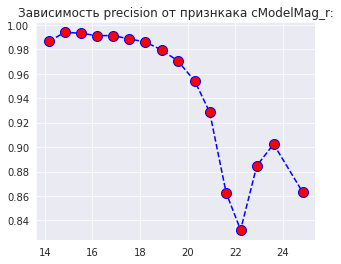

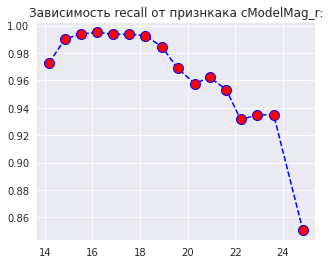

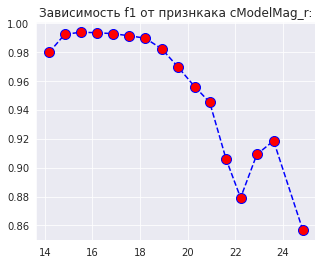

In [90]:
print_plot(lr2)

In [135]:
ys2_pr = lr2.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys2_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys2_pr))
lr2_s = lr2.score(Xs, ys)
print('Star Score: ', lr2_s)
print(ys)
print(ys2_pr)

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00   1103720

    accuracy                           1.00   1103720
   macro avg       1.00      1.00      1.00   1103720
weighted avg       1.00      1.00      1.00   1103720

Confusion Matrix: 
 [[1103720]]
Star Score:  1.0
[1. 1. 1. ... 1. 1. 1.]
[1 1 1 ... 1 1 1]


In [78]:
sub_cl = df_star['subClass'].unique()
sub_cl.shape

(32,)

In [99]:
sub = []
score = []
for i in range(sub_cl.shape[0]):
    indx = df_star['subClass']==sub_cl[i]
    if df_star[indx].shape[0] > 10000: 
        
        ys_pr = lr.predict(Xs[indx])
        print(sub_cl[i])
        print('Classification Report: \n', classification_report(ys[indx], ys_pr))
        #print('Confusion Matrix: \n', confusion_matrix(ys[indx], ys_pr))
        lr_s = lr.score(Xs[indx], ys[indx])
        #print('Star Score: ', lr_s)
        #print(sub_cl[i], df_star[indx].shape[0], lr_s)
        sub.append(sub_cl[i])
        #print(sub)
        score.append(lr_s)
#print(sub)

#plt.figure(figsize = (5,4))
#plt.title('Зависимость precision от признкака r:')
#plt.plot(score, sub, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)


A0
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     71332

    accuracy                           1.00     71332
   macro avg       1.00      1.00      1.00     71332
weighted avg       1.00      1.00      1.00     71332

WD
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     14947

    accuracy                           1.00     14947
   macro avg       1.00      1.00      1.00     14947
weighted avg       1.00      1.00      1.00     14947

G2
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     31603

    accuracy                           1.00     31603
   macro avg       1.00      1.00      1.00     31603
weighted avg       1.00      1.00      1.00     31603

F5
Classification Report: 
               precision    recall  f1-score   support

         1.0  

K
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     16438

    accuracy                           1.00     16438
   macro avg       1.00      1.00      1.00     16438
weighted avg       1.00      1.00      1.00     16438

K3V (32147)
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     21233

    accuracy                           1.00     21233
   macro avg       1.00      1.00      1.00     21233
weighted avg       1.00      1.00      1.00     21233

K5Ve (118100)
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     13943

    accuracy                           1.00     13943
   macro avg       1.00      1.00      1.00     13943
weighted avg       1.00      1.00      1.00     13943



/home/nadia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

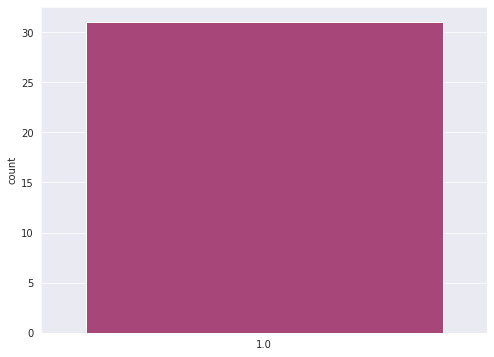

In [100]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(score, palette = 'magma')

In [101]:
M = [list(a) for a in zip(sub, score)]
print(len(M))
M

31


[['A0', 1.0],
 ['WD', 1.0],
 ['G2', 1.0],
 ['F5', 1.0],
 ['C', 1.0],
 ['M', 1.0],
 ['OB', 1.0],
 ['K5', 1.0],
 ['K3', 1.0],
 ['F9', 1.0],
 ['G0', 1.0],
 ['M1', 1.0],
 ['M2', 1.0],
 ['F', 1.0],
 ['M3', 1.0],
 ['M4', 1.0],
 ['K7', 1.0],
 ['K1', 1.0],
 ['M0', 1.0],
 ['G', 1.0],
 ['M5', 1.0],
 ['WD1', 1.0],
 ['F8', 1.0],
 ['F3/F5V (30743)', 1.0],
 ['G8', 1.0],
 ['A', 1.0],
 ['A12', 1.0],
 ['K0', 1.0],
 ['K', 1.0],
 ['K3V (32147)', 1.0],
 ['K5Ve (118100)', 1.0]]

In [85]:
indx = df_star['subClass']==sub_cl[2]
Xs[indx]

array([[2.99498198e+17, 1.23765080e+18, 1.46943860e+02, ...,
        1.64497000e+01, 1.62079000e+01, 1.60963300e+01],
       [2.99499848e+17, 1.23765080e+18, 1.46943860e+02, ...,
        1.64497000e+01, 1.62079000e+01, 1.60963300e+01],
       [3.02987773e+17, 1.23764872e+18, 1.50964100e+02, ...,
        1.71706200e+01, 1.70224200e+01, 1.69663100e+01],
       ...,
       [4.57233590e+17, 1.23766641e+18, 3.53278460e+01, ...,
        1.70726000e+01, 1.69294300e+01, 1.68643400e+01],
       [4.57256956e+17, 1.23766378e+18, 3.62452220e+01, ...,
        1.56635500e+01, 1.55093200e+01, 1.54671700e+01],
       [4.57256956e+17, 1.23766378e+18, 3.62452220e+01, ...,
        1.56635500e+01, 1.55093200e+01, 1.54671700e+01]])

Support Vector Classification

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

In [1]:
#svc_test_acc = print_plot(svc)

Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

In [ ]:
#dt_test_acc = print_plot(dt)

Ensemble Methods

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

In [ ]:
#rf_test_acc = print_plot(rf)

In [ ]:
adb = AdaBoostClassifier(rf)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train)
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

In [ ]:
#adb_test_acc = print_plot(adb)

In [ ]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n0', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train)
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

In [ ]:
#gdb_test_acc = print_plot(gdb)

K Nearest Neighbors Classification

In [17]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plotting error rate vs. number of neighbors

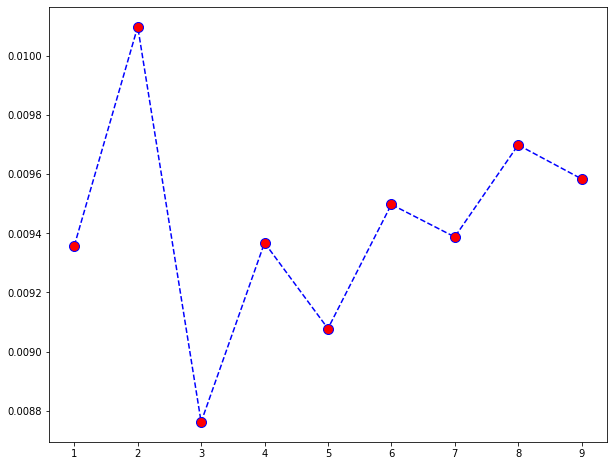

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00    378577
           2       0.99      0.99      0.99    325791
           3       0.98      0.98      0.98    105317

    accuracy                           0.99    809685
   macro avg       0.99      0.99      0.99    809685
weighted avg       0.99      0.99      0.99    809685

Confusion Matrix: 
 [[377973    459    145]
 [  2273 321870   1648]
 [   289   2280 102748]]
Training Score:  0.993691769906659
Testing Score:  0.9912385680851196


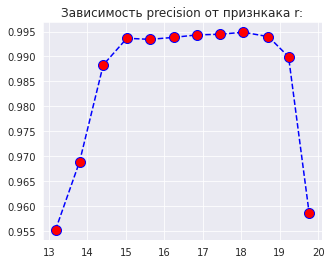

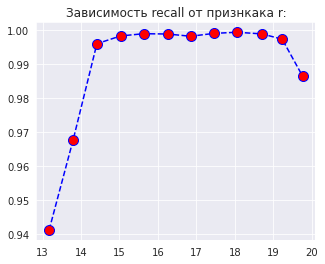

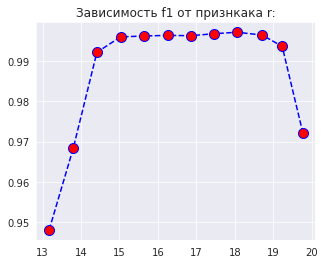

In [88]:
#knn_test_acc = print_plot(knn)
print_plot(knn)

In [28]:
ys_pr = knn.predict(Xs)
print('Classification Report: \n', classification_report(ys, ys_pr))
print('Confusion Matrix: \n', confusion_matrix(ys, ys_pr))
knn_s = knn.score(Xs, ys)
print('Star Score: ', knn_s)

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.47      0.64   1156692
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.47   1156692
   macro avg       0.33      0.16      0.21   1156692
weighted avg       1.00      0.47      0.64   1156692

Confusion Matrix: 
 [[543489 463637 149566]
 [     0      0      0]
 [     0      0      0]]
Star Score:  0.46986492514861344


In [ ]:
#print([df['r'].min(), df['r'].max()]) #интервал значений r

Проверка точности была проведена не для всех интерваллов r, из-за осутсвия достаточного кол-ва данных о них. Но заметим сходство для графиков precision от признкака r. Наименьшую точность классификаторы показывают для r < 15. 
Сравним показатели precision при r < 15 для разных классификаторов.

In [ ]:
trace1 = go.Bar(
    x=['Logistic Regression','SVC','Decision Tree','Random Forest','AdaBoost','Gradient Boosting','KNN'],
    y=[lr_test_acc,svc_test_acc,dt_test_acc,rf_test_acc,adb_test_acc,gdb_test_acc,knn_test_acc],
    name = 'Accuracy Comparisons of the 4 algorithms',
        marker=dict(
                
    ),
)

layout = go.Layout(
    title='Precision классификации звезд с r < 15'
)

data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratio")

Так же стоит отметить "провисание" precision в интервале 16 < r < 18. Это можно объяснить тем, что такие значения r характерны как для звезд, так и для галактик:

In [ ]:
#sns.pairplot(data = df1, palette = 'Dark2', vars='r', hue = 'class', height=4, aspect=3)